In [1]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import time
from datetime import datetime, timedelta

In [17]:
df = pd.read_csv('klse_tickers.csv')
df.head()

,Ticker
0,0001.KL
1,0002.KL
2,0005.KL
3,0006.KL
4,0007.KL


In [2]:
ticker_symbol = '1155.KL'
data = yf.download(ticker_symbol, period='1y')

C:\Users\Ryan Chin\AppData\Local\Temp\ipykernel_29464\3197844676.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker_symbol, period='1y')
[*********************100%***********************]  1 of 1 completed


In [4]:
yf.Ticker(ticker_symbol).info

{'address1': 'Menara Maybank',
 'address2': '14th Floor 100 Jalan Tun Perak',
 'city': 'Kuala Lumpur',
 'zip': '50050',
 'country': 'Malaysia',
 'phone': '60 3 2070 8833',
 'fax': '60 3 2031 0071',
 'website': 'https://www.maybank.com',
 'industry': 'Banks - Regional',
 'industryKey': 'banks-regional',
 'industryDisp': 'Banks - Regional',
 'sector': 'Financial Services',
 'sectorKey': 'financial-services',
 'sectorDisp': 'Financial Services',
 'longBusinessSummary': "Malayan Banking Berhad provides commercial banking and related financial products and services. The company operates in three segments: Group Community Financial Services, Group Global Banking, and Group Insurance and Takaful. It offers savings and fixed deposits, and current accounts; and housing and personal loans, project financing, overdrafts, and trade financing, as well as remittance services. The company also provides credit cards; bancassurance products; hire purchase, unit trust, cash management, custodian, and tr

In [18]:
sectors = []

for ticker in df['Ticker']:
    try:
        info = yf.Ticker(ticker).info
        sector = info.get('sector', 'Unknown')
    except Exception as e:
        sector = 'Unknown'
    sectors.append(sector)
    time.sleep(0.5)  # To avoid hitting API rate limits

df['Sector'] = sectors
    

HTTP Error 404: {"quoteSummary":{"result":null,"error":{"code":"Not Found","description":"Quote not found for symbol: 03048.KL"}}}
HTTP Error 404: {"quoteSummary":{"result":null,"error":{"code":"Not Found","description":"Quote not found for symbol: 0400.KL"}}}
HTTP Error 404: {"quoteSummary":{"result":null,"error":{"code":"Not Found","description":"Quote not found for symbol: 0401.KL"}}}
HTTP Error 404: {"quoteSummary":{"result":null,"error":{"code":"Not Found","description":"Quote not found for symbol: 0800.KL"}}}
HTTP Error 404: {"quoteSummary":{"result":null,"error":{"code":"Not Found","description":"Quote not found for symbol: 0820.KL"}}}
HTTP Error 404: {"quoteSummary":{"result":null,"error":{"code":"Not Found","description":"Quote not found for symbol: 0821.KL"}}}
HTTP Error 404: {"quoteSummary":{"result":null,"error":{"code":"Not Found","description":"Quote not found for symbol: 0822.KL"}}}
HTTP Error 404: {"quoteSummary":{"result":null,"error":{"code":"Not Found","description":

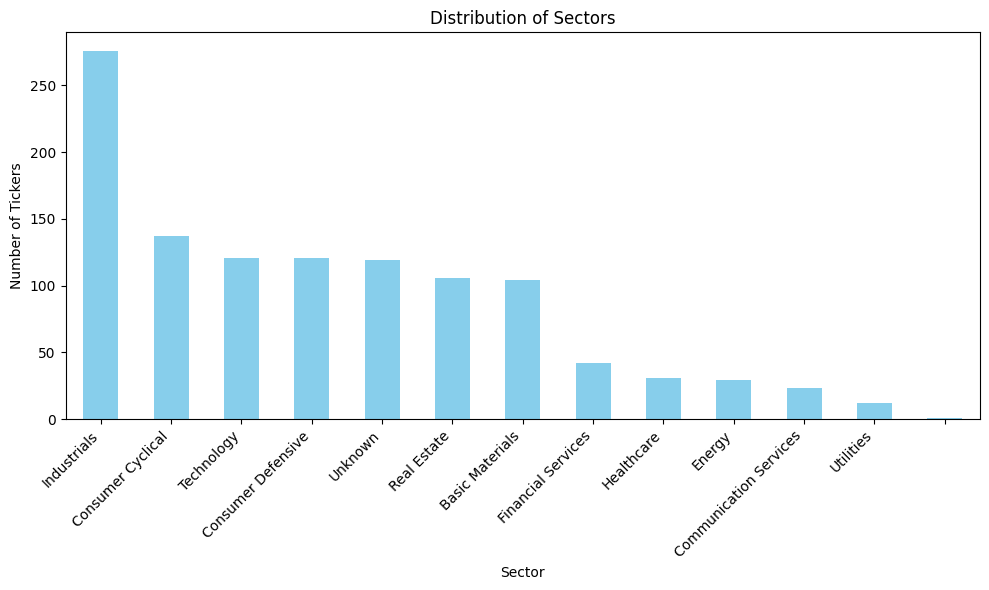

In [19]:
sector_counts = df['Sector'].value_counts()

plt.figure(figsize=(10,6))
sector_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Sectors')
plt.xlabel('Sector')
plt.ylabel('Number of Tickers')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [10]:
ticker = yf.Ticker(ticker_symbol)
financials = ticker.financials
balance_sheet = ticker.balance_sheet
cashflow = ticker.cashflow

num_financials_features = financials.shape[0]
print(f"Number of financial features: {num_financials_features}")

Number of financial features: 40


In [13]:
balance_sheet  

,2024-12-31,2023-12-31,2022-12-31,2021-12-31,2020-12-31
Ordinary Shares Number,1.206695e+10,1.206024e+10,1.205413e+10,1.187851e+10,NaN
Share Issued,1.206695e+10,1.206024e+10,1.205413e+10,1.187851e+10,NaN
Total Debt,4.940891e+10,5.396970e+10,5.405016e+10,6.039927e+10,NaN
Tangible Book Value,8.697734e+10,8.727971e+10,7.899906e+10,7.912796e+10,NaN
Invested Capital,1.420627e+11,1.470982e+11,1.386567e+11,1.450829e+11,NaN
Net Tangible Assets,8.697734e+10,8.727971e+10,7.899906e+10,7.912796e+10,NaN
Common Stock Equity,9.397063e+10,9.464162e+10,8.574618e+10,8.581142e+10,NaN
Total Capitalization,1.420627e+11,1.470982e+11,1.386567e+11,1.450829e+11,NaN
Total Equity Gross Minority Interest,9.720714e+10,9.764816e+10,8.861209e+10,8.855242e+10,NaN
Minority Interest,3.236509e+09,3.006546e+09,2.865903e+09,2.740999e+09,NaN


In [12]:
print(cashflow.shape[0])

48


In [ ]:
data = yf.download(ticker_symbol, period='1y')
data.head()

Price,Close,High,Low,Open,Volume
Ticker,1155.KL,1155.KL,1155.KL,1155.KL,1155.KL
Date,,,,,
2020-10-28,4.978539,4.999665,4.971498,4.985581,2926000
2020-10-30,4.929246,4.992623,4.929246,4.978539,8677900
2020-11-02,4.936288,4.950372,4.901079,4.929246,4829300
2020-11-03,4.929246,4.957414,4.908121,4.936288,6801700
2020-11-04,4.929246,4.992623,4.922204,4.943330,2220100


In [53]:
ticker = yf.Ticker(ticker_symbol)
info = ticker.info
print(info)

{'address1': 'Menara Maybank', 'address2': '14th Floor 100 Jalan Tun Perak', 'city': 'Kuala Lumpur', 'zip': '50050', 'country': 'Malaysia', 'phone': '60 3 2070 8833', 'fax': '60 3 2031 0071', 'website': 'https://www.maybank.com', 'industry': 'Banks - Regional', 'industryKey': 'banks-regional', 'industryDisp': 'Banks - Regional', 'sector': 'Financial Services', 'sectorKey': 'financial-services', 'sectorDisp': 'Financial Services', 'longBusinessSummary': "Malayan Banking Berhad provides commercial banking and related financial products and services. The company operates in three segments: Group Community Financial Services, Group Global Banking, and Group Insurance and Takaful. It offers savings and fixed deposits, and current accounts; and housing and personal loans, project financing, overdrafts, and trade financing, as well as remittance services. The company also provides credit cards; bancassurance products; hire purchase, unit trust, cash management, custodian, and trustee services

In [ ]:
stock_codes = df['STOCK CODE'].dropna().astype(str).tolist()
print(f"Number of stock codes extracted: {len(stock_codes)}")